This work builds on the excellent notebook put together by @saadmuhammad17
-  https://www.kaggle.com/saadmuhammad17/a-beginners-guide-to-data-science-top-3


In [2]:
# import modules from Python

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import datawig

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#from fancyimpute import KNN - 

# location of data files, read data

test_filepath = "../test.csv"
train_filepath = "../train.csv"

train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)


2020-09-29 21:55:42,294 [INFO]  NumExpr defaulting to 4 threads.


In [2]:
# confirm contents of test_data

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# confirm contents of train_data - includes 'Survived'

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# find shape of data (rows, columns)

print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [5]:
# to see what types of data each col contains
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.describe()

# stats operations only work on numeric fields

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# take a look at all of the fields

train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Van Impe, Miss. Catharina",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# determine number of blank values

train_null = train_data.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

1. Effect of gender (sex) on survival

In [9]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
def calculate_survival_sex (gender):
    sex_survival = train_data.loc[train_data.Sex == gender]["Survived"]
    sex_rate = sum(sex_survival)/len(sex_survival)
    print("Percent of class", gender, "who survived", sex_rate)
    
genders = ['male','female']    
    
for values in genders:
    calculate_survival_sex(values)

Percent of class male who survived 0.18890814558058924
Percent of class female who survived 0.7420382165605095


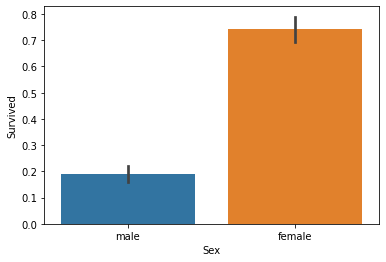

In [11]:
# plot of gender to Survived

sns.barplot(x='Sex', y='Survived', data=train_data)

2. Effect of category Pclass

In [12]:
def calculate_survival_pclass (pclass):
    pclass_survival = train_data.loc[train_data.Pclass == pclass]["Survived"]
    pclass_rate = sum(pclass_survival)/len(pclass_survival)
    print("Percent of class", pclass, "who survived", pclass_rate)
    
    
for values in range(1, 4):
    calculate_survival_pclass(values)

Percent of class 1 who survived 0.6296296296296297
Percent of class 2 who survived 0.47282608695652173
Percent of class 3 who survived 0.24236252545824846


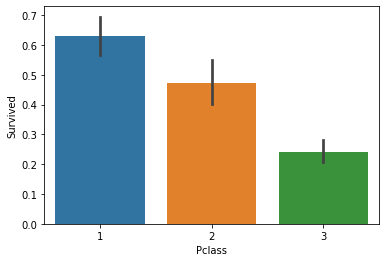

In [13]:
# plot of Pclass to Survived

sns.barplot(x='Pclass', y='Survived', data=train_data)

3. Effect of category 'Embarked'

In [14]:
# find unique values in Embarked

train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

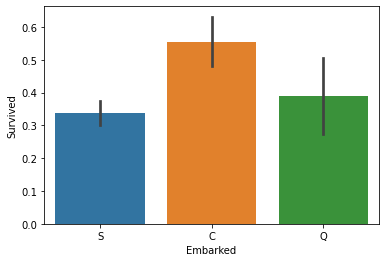

In [32]:
# plot of Pclass to Survived

sns.barplot(x='Embarked', y='Survived', data=train_data)

In [33]:
def calculate_survival_embarked (embarkation_point):
    embarked_survival = train_data.loc[train_data.Embarked == embarkation_point]["Survived"]
    embarked_rate = sum(embarked_survival)/len(embarked_survival)
    print("Percent of Embarkation", embarkation_point, "who survived", embarked_rate)
    
departures = ['S','C','Q']    
    
for values in departures:
    calculate_survival_embarked(values)

Percent of Embarkation S who survived 0.33695652173913043
Percent of Embarkation C who survived 0.5535714285714286
Percent of Embarkation Q who survived 0.38961038961038963


4. Effect of category 'Parch'

In [34]:
# find unique values in Parch

train_data.Parch.value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

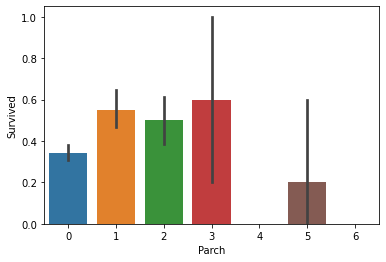

In [35]:
# plot of Parch to Survived

sns.barplot(x='Parch', y='Survived', data=train_data)

In [36]:
def calculate_survival_parch (parch_value):
    parch_survival = train_data.loc[train_data.Parch == parch_value]["Survived"]
    parch_rate = sum(parch_survival)/len(parch_survival)
    print("Percent of Parch", parch_value, "who survived", parch_rate)
    
for values in range(0, 7):
    calculate_survival_parch(values)

Percent of Parch 0 who survived 0.34365781710914456
Percent of Parch 1 who survived 0.5508474576271186
Percent of Parch 2 who survived 0.5
Percent of Parch 3 who survived 0.6
Percent of Parch 4 who survived 0.0
Percent of Parch 5 who survived 0.2
Percent of Parch 6 who survived 0.0


5. Effect of category 'SibSp'

In [38]:
# find unique values in SibSp

train_data.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

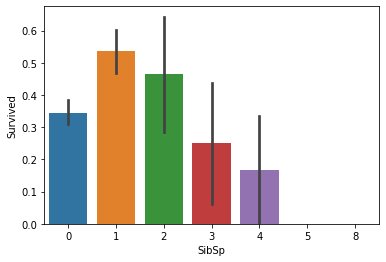

In [39]:
# plot of SibSp to Survived

sns.barplot(x='SibSp', y='Survived', data=train_data)

In [42]:
def calculate_survival_sibsp (sibsp_value):
    sibsp_survival = train_data.loc[train_data.SibSp == sibsp_value]["Survived"]
    sibsp_rate = sum(sibsp_survival)/len(sibsp_survival)
    print("Percent of SibSp", sibsp_value, "who survived", sibsp_rate)

value_range = [1,2,3,4,5,8]    
    
for values in value_range:
    calculate_survival_sibsp(values)

Percent of SibSp 1 who survived 0.5358851674641149
Percent of SibSp 2 who survived 0.4642857142857143
Percent of SibSp 3 who survived 0.25
Percent of SibSp 4 who survived 0.16666666666666666
Percent of SibSp 5 who survived 0.0
Percent of SibSp 8 who survived 0.0


6. Effect of category 'Fare'

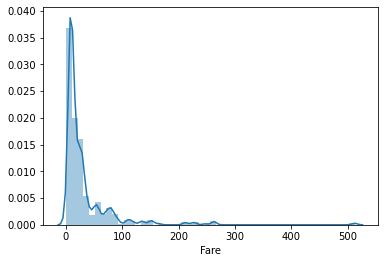

In [43]:
# distribution plot of Fares

x = train_data.Fare

sns.distplot(x)

In [44]:
# function to calculate survival rate

def calculate_fare_survival_rate(value1, value2):
    fare = train_data.loc[train_data.Fare.between(value1, value2)]["Survived"]
    rate_fare = sum(fare)/len(fare)
    print("% of Fare between ", value1, "and", value2, "who survived:", rate_fare, "Number survived", len(fare))

# array of values to put into function    
    
values = [(0,10),(11,20),(21,30),(31,40),(41,50),(51,60),(61,70),(71,80),(81,90),(91,100),(101,200),(201,300),(301,600)]


for v in values:
    calculate_fare_survival_rate(v[0],v[1])

% of Fare between  0 and 10 who survived: 0.19940476190476192 Number survived 336
% of Fare between  11 and 20 who survived: 0.44370860927152317 Number survived 151
% of Fare between  21 and 30 who survived: 0.44360902255639095 Number survived 133
% of Fare between  31 and 40 who survived: 0.3673469387755102 Number survived 49
% of Fare between  41 and 50 who survived: 0.26666666666666666 Number survived 15
% of Fare between  51 and 60 who survived: 0.7297297297297297 Number survived 37
% of Fare between  61 and 70 who survived: 0.35294117647058826 Number survived 17
% of Fare between  71 and 80 who survived: 0.6129032258064516 Number survived 31
% of Fare between  81 and 90 who survived: 0.8235294117647058 Number survived 17
% of Fare between  91 and 100 who survived: 1.0 Number survived 4
% of Fare between  101 and 200 who survived: 0.7575757575757576 Number survived 33
% of Fare between  201 and 300 who survived: 0.6470588235294118 Number survived 17
% of Fare between  301 and 600 w

In [46]:
# put values into a dataframe, better way to display above data
#df2 = pd.DataFrame
fare_stats = []

def calculate_fare_survival_rate(value1, value2):
    fare = train_data.loc[train_data.Fare.between(value1, value2)]["Survived"]
    rate_fare = sum(fare)/len(fare)
    fare_stats.append([value1,value2,rate_fare,len(fare)])
    #print("% of Fare between ", value1, "and", value2, "who survived:", rate_fare, "Number survived", len(fare))

# array of values to put into function    
    
values = [(0,10),(11,20),(21,30),(31,40),(41,50),(51,60),(61,70),(71,80),(81,90),(91,100),(101,200),(201,300),(301,600)]


for v in values:
    calculate_fare_survival_rate(v[0],v[1])

df02 = pd.DataFrame(fare_stats, columns=["MinValue", "MaxValue", "SurvivalRate", "NumberSurvived"])

df02

,MinValue,MaxValue,SurvivalRate,NumberSurvived
0,0,10,0.199405,336
1,11,20,0.443709,151
2,21,30,0.443609,133
3,31,40,0.367347,49
4,41,50,0.266667,15
5,51,60,0.729730,37
6,61,70,0.352941,17
7,71,80,0.612903,31
8,81,90,0.823529,17
9,91,100,1.000000,4


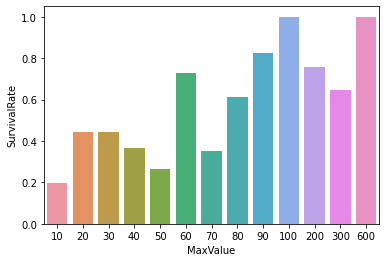

In [48]:
# lets stick this in a chart to visualize it

sns.barplot(x='MaxValue', y='SurvivalRate', data=df02)

In [3]:
# imputation based on initial statistical analysis

# 1. Make copies of train and test

df_train2 = train_data.copy()
df_test2 = test_data.copy()

In [4]:
 # 2. Find some basic correlations in the data to help guide imputation

# corr - correlation (pearson, kendall, spearman or callable)
# abs - absolute value of a number (turns negatives into positives)
# unstack - 
# reset_index -=
    
# transformation step to create correlation scores    
    
df_corr = df_train2.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

# rename columns to more generic names

df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [5]:
#  3. training data - find median age values for sex-Pclass data points

age_by_pclass_sex = df_train2.groupby(['Sex', 'Pclass']).median()['Age']

#age_by_pclass_sex

# loop through plcass and sex values to show median values in train_data

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_train2['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [6]:
# 4. training data - transform missing age values with sex-Pclass interaction values

df_train2['Age'] = df_train2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [7]:
# 5. test_data - find median age values for sex-Pclass data points

# Filling the missing values in test frame as well for Age with the medians of Sex and Pclass groups
age_by_pclass_sex = df_test2.groupby(['Sex', 'Pclass']).median()['Age']

#age_by_pclass_sex

# loop through plcass and sex values to show median values in test_data

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_test2['Age'].median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


In [8]:
# 6. test data - transform missing age values with sex-Pclass interaction values

df_test2['Age'] = df_test2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [9]:
# 7. train data - Check if the transformations have left any null values]

train_null = df_train2.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
# 8. test data - Check if the transformations have left any null values]

test_null = df_test2.isnull().sum().sort_values(ascending=False)
test_null

Cabin          327
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [11]:
# Embarked

#filling embarked with most frquent value
common_value = 'S'
embark = [df_train2, df_test2]

for dataset in embark:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [12]:
# find median fare

# median fare for Pclass = 3, Parch = 0, Sibsp = 0
#med_fare = df_test2.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

for parch_value in range(1, 4):
    med_fare = df_test2.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[parch_value][0][0]
    print("Median Fare for Passenger class:",parch_value, med_fare)

med_fare

Median Fare for Passenger class: 1 31.6792
Median Fare for Passenger class: 2 13.0
Median Fare for Passenger class: 3 7.7958


7.7958

In [13]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
fare = [df_test2]

for dfall in fare:
    dfall['Fare'] = dfall['Fare'].fillna(med_fare)

Feature Creation

In [14]:
# name title

#take title out of name
Feature = [df_train2, df_test2]
min_feature = 10

# loop through train and test and 
 
for dataset in Feature:
     dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# get frequencies of titles frequencies less than 10

title = (df_train2['Title'].value_counts() < min_feature)

# assign minor titles to 'Misc'

df_train2['Title'] = df_train2['Title'].apply(lambda x: 'Misc' if title.loc[x] == True else x)

df_train2['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [15]:
# test title label - group female survival by title

Survived_female = df_train2[df_train2.Sex=='female'].groupby(['Sex','Title'])['Survived'].mean()
Survived_female

Sex     Title
female  Misc     1.000000
        Miss     0.697802
        Mrs      0.792000
Name: Survived, dtype: float64

In [16]:
# test title label - group male survivals by title

Survived_male = df_train2[df_train2.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
Survived_male

Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64

In [17]:
#encoding for Title

Feature1 = [df_train2, df_test2]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

for dataset in Feature1:
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
df_train2['Title'].value_counts()

1    517
2    182
3    125
4     40
5     27
Name: Title, dtype: int64

Split Fares data into groups - create a Fare bin

In [18]:
# use qcut to find bands to split fare values

pd.qcut(df_train2['Fare'], 5).value_counts()


(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [18]:
# create Fare_bin based on qcut values

Fare_bin = [df_train2, df_test2]
for dataset in Fare_bin:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 513), 'Fare'] = 4

In [19]:
df_test2['Fare'].value_counts()

0    120
4     88
2     85
3     77
1     48
Name: Fare, dtype: int64

Split Age data into groups - create an Age bin

In [20]:
# use qcut to find bands to split age values

pd.qcut(df_train2['Age'], 5).value_counts()

(20.0, 25.0]     258
(30.0, 40.0]     185
(0.419, 20.0]    179
(40.0, 80.0]     150
(25.0, 30.0]     119
Name: Age, dtype: int64

In [21]:
age_bin = [df_train2, df_test2]
for dataset in age_bin:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 80), 'Age'] = 4

In [22]:
# show distribution of values in Age bin

df_test2['Age'].value_counts()

1    146
4     85
0     69
2     62
3     56
Name: Age, dtype: int64

In [23]:
# Label encode Sex (gender) column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sex_col = [df_train2, df_test2]

for dataset in sex_col:
    dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

In [24]:
# label encode Embarked column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

embarked_col = [df_train2, df_test2]

for dataset in embarked_col:
    dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])
    
    

In [25]:
# set output 'y' and features

y = df_train2["Survived"]

#features = ["Pclass","Sex","SibSp","Parch","Fare","Embarked"]
features = ["Pclass","Sex","SibSp","Parch","Fare","Embarked","Title"]

X = df_train2.loc[:, df_train2.columns.isin(list(features))]
X_test = df_test2.loc[:, df_test2.columns.isin(list(features))]



In [26]:
# check contents of X
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,1,1,0,0,2,1
1,1,0,1,0,4,0,3
2,3,0,0,0,0,2,2
3,1,0,1,0,4,2,3
4,3,1,0,0,1,2,1
...,...,...,...,...,...,...,...
886,2,1,0,0,2,2,5
887,1,0,0,0,3,2,2
888,3,0,1,2,3,2,2
889,1,1,0,0,3,0,1


In [27]:
# check contents of X_test

X_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,1,0,0,0,1,1.0
1,3,0,1,0,0,2,3.0
2,2,1,0,0,1,1,1.0
3,3,1,0,0,1,2,1.0
4,3,0,1,1,2,2,3.0
...,...,...,...,...,...,...,...
413,3,1,0,0,1,2,1.0
414,1,0,0,0,4,0,0.0
415,3,1,0,0,0,2,1.0
416,3,1,0,0,1,2,1.0


Run different techniques to find optimum one

In [28]:
# 1. DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random') 
decision_tree.fit(X, y)  
dt_pred = decision_tree.predict(X_test)  
dt_score = round(decision_tree.score(X, y) * 100, 2)
print("score:", dt_score, "%")

# score = 86.98%


score: 86.98 %


In [29]:
# 2. KNN , n= 3

def find_predictions_knn (n_value):
    knn = KNeighborsClassifier(n_neighbors = n_value) 
    knn.fit(X, y)  
    knn_pred = knn.predict(X_test)  
    knn_score1 = round(knn.score(X, y) * 100, 2)
    print("KNN score:", knn_score1, "% for n_neigbours value of ", n_value)

for values in range(2, 7):
    find_predictions_knn(values)


KNN score: 84.4 % for n_neigbours value of  2
KNN score: 85.41 % for n_neigbours value of  3
KNN score: 84.96 % for n_neigbours value of  4
KNN score: 85.3 % for n_neigbours value of  5
KNN score: 84.06 % for n_neigbours value of  6


In [42]:
# 3. Random Forest Classifier

rfc_stats = []

def find_predictions_rfclassifier (nest_value, maxdepth_value):
    model = RandomForestClassifier(criterion = "gini", 
                                           min_samples_leaf = 1, 
                                           min_samples_split = 10,
                                           max_depth = maxdepth_value,
                                           n_estimators= nest_value, 
                                           max_features='auto', 
                                           oob_score=True, 
                                           random_state=1, 
                                           n_jobs=-1)

    model.fit(X, y)
    predictions = model.predict(X_test)
    rf_score = round(model.score(X, y) * 100, 2)
    rfc_stats.append([nest_value,maxdepth_value,rf_score])
    #print("Random Forest: N_estimators =", nest_value, "Maxdepth Value:",maxdepth_value, "Score:", rf_score, "%")

nestimators = [150,200,250]    

for nestimator in nestimators:
    for values in range(4,13):
        find_predictions_rfclassifier(nestimator, values)
        
rf01 = pd.DataFrame(rfc_stats, columns=["N-Estimators", "MaxDepth", "Score"])

rf01

,N-Estimators,MaxDepth,Score
0,150,4,83.28
1,150,5,84.29
2,150,6,85.07
3,150,7,85.07
4,150,8,85.75
5,150,9,85.75
6,150,10,85.75
7,150,11,85.97
8,150,12,85.86
9,200,4,83.28


In [35]:
# 4. SVM

svm_stats = []

def find_predictions_svm (degree_value):
    model = SVC(C=1, kernel='poly', random_state=0, gamma = 'auto', degree = degree_value)
    model.fit(X, y)
    svm_pred = model.predict(X_test)
    svm_score = round(model.score(X, y) * 100, 2)
    svm_stats.append(['SVM',degree_value,svm_score])
    #print("score:", svm_score, "%")

# do not exceed 13
    
for values in range(2,13):
    find_predictions_svm(values)
        
sv01 = pd.DataFrame(svm_stats, columns=["Method","Degree", "Score"])

sv01

,Method,Degree,Score
0,SVM,2,82.15
1,SVM,3,83.73
2,SVM,4,84.29
3,SVM,5,85.75
4,SVM,6,86.87
5,SVM,7,86.98
6,SVM,8,86.98
7,SVM,9,86.98
8,SVM,10,86.98
9,SVM,11,86.98


In [31]:
# 5. XGB Classifier

clf = XGBClassifier()
clf.fit(X, y, eval_metric='auc', verbose=True)
xgb_pred = clf.predict(X_test)
xgb_score = round(clf.score(X, y) * 100, 2)
print("score:", xgb_score, "%")



score: 86.98 %


In [34]:
# 7. Perceptron

def find_predictions_perceptron (max_iter_value):
    perceptron = Perceptron(max_iter= max_iter_value)
    perceptron.fit(X, y)
    percep_pred = perceptron.predict(X_test)
    percep_score = round(perceptron.score(X, y) * 100, 2)
    print("score:", percep_score, "%")

for value in range(3,12):
    find_predictions_perceptron(value)


score: 75.2 %
score: 67.34 %
score: 80.81 %
score: 78.34 %
score: 79.69 %
score: 76.99 %
score: 61.62 %
score: 78.56 %
score: 79.46 %


/Users/redmondgarvey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/redmondgarvey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/redmondgarvey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/redmondgarvey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

In [1]:
# create submission using xgb_pred

output = pd.DataFrame({'PassengerId': df_test2.PassengerId, 'Survived': dt_pred})
output.to_csv('my_submission.csv', index=False)

NameError: name 'pd' is not defined